<a href="https://colab.research.google.com/github/rodayna-moamen/fraud_detection_project/blob/main/03_evalutation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
)

# Load model and scaler
model = joblib.load("final_model.pkl")
scaler = joblib.load("scaler.pkl")

# Load processed test data
X_test = pd.read_csv("test_processed.csv")
y_test = pd.read_csv("y_test.csv")["Fraud"]

# Scale test data
X_test_scaled = scaler.transform(X_test)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [15]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = average_precision_score(y_test, y_proba)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("PR-AUC:", pr_auc)


Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC: 0.6316195839767462
PR-AUC: 0.15161987301527996


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


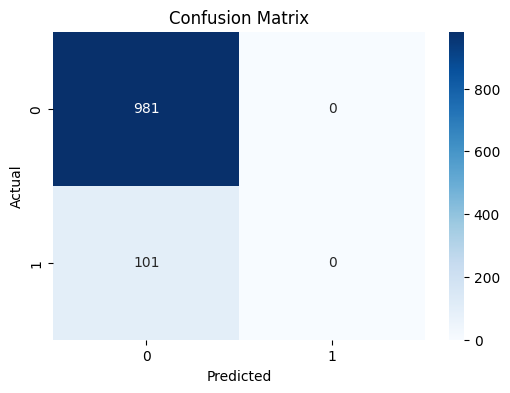

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



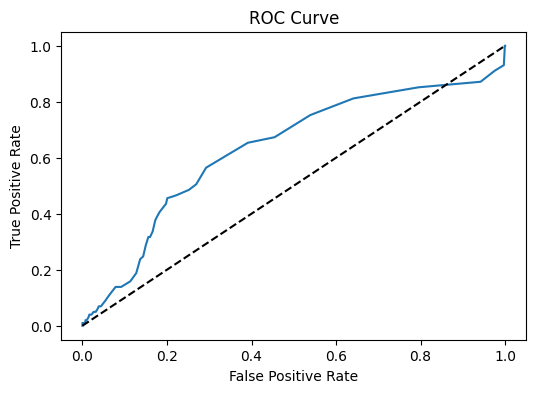

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


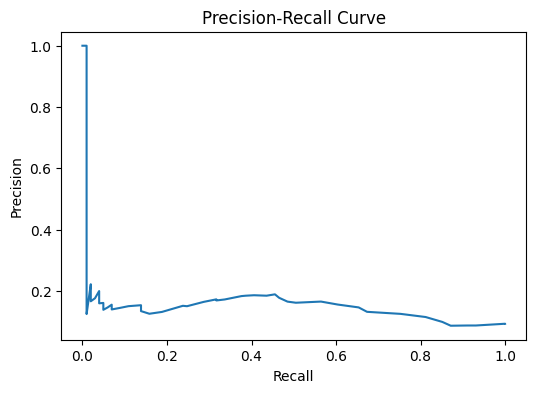

In [18]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [19]:
test_df = X_test.copy()
test_df["y_true"] = y_test
test_df["y_pred"] = y_pred
test_df["y_proba"] = y_proba

false_positives = test_df[(test_df["y_true"] == 0) & (test_df["y_pred"] == 1)]
false_negatives = test_df[(test_df["y_true"] == 1) & (test_df["y_pred"] == 0)]

print("False Positives (2–3 examples):")
display(false_positives.head(3))

print("False Negatives (2–3 examples):")
display(false_negatives.head(3))


False Positives (2–3 examples):


,TotalClaims,UniquePatients,TotalReimbursed,AvgReimbursed,StdReimbursed,MaxReimbursed,MinReimbursed,TotalDeductible,AvgDeductible,InpatientClaims,...,ObstrPulmonary_Rate,Depression_Rate,Diabetes_Rate,IschemicHeart_Rate,Osteoporasis_Rate,rheumatoidarthritis_Rate,stroke_Rate,y_true,y_pred,y_proba


False Negatives (2–3 examples):


,TotalClaims,UniquePatients,TotalReimbursed,AvgReimbursed,StdReimbursed,MaxReimbursed,MinReimbursed,TotalDeductible,AvgDeductible,InpatientClaims,...,ObstrPulmonary_Rate,Depression_Rate,Diabetes_Rate,IschemicHeart_Rate,Osteoporasis_Rate,rheumatoidarthritis_Rate,stroke_Rate,y_true,y_pred,y_proba
13,0.119319,0.445702,2.740888,1.319326,1.294332,2.307016,-0.162704,3.912528,2.099292,3.874614,...,0.312475,0.119166,0.171100,-0.092981,0.107683,0.661538,0.515503,1,0,0.215
16,1.137666,2.295347,3.325061,0.205063,1.268156,3.145703,-0.162704,3.188825,0.194834,3.097297,...,0.037468,0.094783,0.224572,0.280816,0.165246,0.242239,-0.045579,1,0,0.200
29,0.092318,0.258491,2.209423,1.095705,1.776723,2.307016,-0.162704,2.495427,1.326841,2.492716,...,-0.070803,0.038177,-0.158109,-0.293044,0.032057,0.118064,0.742692,1,0,0.180
